In [1]:
import glob
import time
import random
import numpy
import pandas
from matplotlib import pyplot
from deap import base, creator, tools
from genetic_algorithm import ga
from genetic_algorithm.tools import plot_ga_progress, sat_fitness, read_sat_instances

In [2]:
files = glob.glob('data/sat/uf50-*.cnf')
instances = read_sat_instances(files)
instances.info()
instances.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 120 entries, (50, 1) to (218, 30)
Data columns (total 5 columns):
formula    120 non-null object
m          120 non-null int64
n          120 non-null int64
weights    120 non-null object
ratio      120 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ KB


formula   m   n  \
50 1  [[-3, 36, 7], [-3, -42, -48], [-49, -47, -41],...  50  50   
   2  [[42, 28, 33], [1, -12, 2], [-15, -38, -12], [...  50  50   
   3  [[-45, -37, -1], [-40, 21, 39], [34, -8, -13],...  50  50   
   4  [[-11, 38, -43], [7, 42, 17], [44, -13, -47], ...  50  50   
   5  [[44, 49, 45], [46, -43, 5], [3, -15, 11], [5,...  50  50   

                                                weights  ratio  
50 1  [927, 860, 138, 202, 831, 133, 778, 157, 491, ...    1.0  
   2  [619, 130, 504, 970, 983, 982, 713, 594, 937, ...    1.0  
   3  [641, 827, 731, 545, 734, 166, 797, 1024, 907,...    1.0  
   4  [102, 226, 242, 95, 280, 269, 598, 524, 141, 5...    1.0  
   5  [242, 773, 356, 854, 197, 226, 545, 236, 337, ...    1.0

In [3]:
# fitness value is maximalized
creator.create('Fitness', base.Fitness, weights=(1,))
creator.create('Individual', list, fitness=creator.Fitness)

gen	new	min	max	avg  	std    
0  	100	-14	-2 	-6.68	2.09227
1  	99 	-10	-2 	-5.72	1.38622
2  	99 	-9 	-2 	-5   	1.2083 
3  	99 	-7 	-2 	-4.31	1.00693
4  	99 	-6 	-2 	-3.86	0.916733
5  	99 	-6 	-2 	-3.46	0.805233
6  	99 	-5 	-1 	-3.21	0.803679
7  	99 	-5 	-1 	-2.87	0.795676
8  	99 	-5 	-1 	-2.57	0.803181
9  	99 	-4 	14291	140.76	1422.15 
10 	99 	-4 	14291	140.92	1422.14 
11 	99 	-3 	14291	422.05	2410.01 
12 	99 	-4 	15582	1447.65	4349.65 
13 	99 	-3 	15582	1892.76	4903.36 
14 	99 	-3 	15582	3065.73	5954.85 
15 	99 	-3 	16132	5017.62	7004.9  
16 	99 	-3 	16544	7071.2 	7525.19 
17 	99 	-3 	17536	10462  	7040.85 
18 	99 	-2 	17536	12243.3	6160.83 
19 	99 	-2 	17536	12795.6	6041.25 
20 	99 	-2 	17536	14346.7	4849.72 
21 	99 	-3 	17958	13108.1	6585.81 
22 	99 	-2 	17958	13898.5	6100.52 
23 	99 	-2 	18703	14451.7	5861.51 
24 	99 	-2 	18703	15473  	4909.44 
25 	99 	-2 	18703	15228.8	5382.13 
26 	99 	-3 	18703	14690.6	6199.77 
27 	99 	-2 	18865	13972.3	7007.31 
28 	99 	-2 	18865	16029.5	5076.13

233	99 	-1   	23443	23185.1	2334.03 
234	99 	-2   	23443	22495.5	4592.81 
235	99 	-1   	23443	23202.8	2332.72 
236	99 	23443	23443	23443  	0       
237	99 	-2   	23443	22253  	5106.88 
238	99 	-2   	23443	22262.6	5108.21 
239	99 	-1   	23443	22941.4	3280.87 
240	99 	-1   	23443	22725.8	3998.03 
241	99 	22877	23443	23434  	64.9516 
242	99 	-1   	23443	22964.6	3282.06 
243	99 	-2   	23443	22957.8	3281.91 
244	99 	-1   	23443	23178.8	2334.51 
245	99 	-1   	23443	22958.4	3281.09 
246	99 	-1   	23443	22731.4	3998.64 
247	99 	-2   	23443	23204.9	2332.61 
248	99 	22475	23443	23431.9	96.836  
249	99 	-1   	23443	22955.7	3280.76 
250	99 	-1   	23443	22965.8	3282.01 
251	99 	-2   	23443	23194.8	2333.32 
252	99 	-1   	23443	22962.4	3281.63 
253	99 	22536	23443	23428.4	105.17  
254	99 	-1   	23443	22722.6	3997.26 
255	99 	22732	23443	23435.9	70.7436 
256	99 	-1   	23443	22951.9	3281.53 
257	99 	-2   	23443	22721.1	3998.16 
258	99 	-2   	23443	23184.3	2333.66 
259	99 	-2   	23443	22950  	3281.87 
2

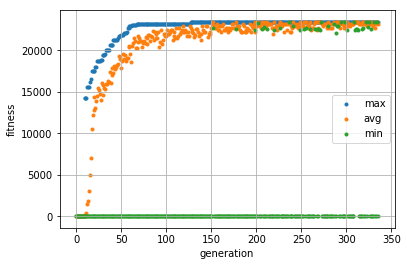

In [4]:
N_POP = 100
CXPB = 0.0
INDPB = 0.01

instance = instances.loc[50, 1]

toolbox = base.Toolbox()
toolbox.register('attr_item', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_item, 50)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('select', tools.selTournament, tournsize=2)
toolbox.register('evaluate', sat_fitness, cnf=instance['formula'], weights=instance['weights'])

population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, early_stop=(1, 100), cxpb=CXPB, mutpb=1, elitism=1, verbose=True, indpb=INDPB, decay=0.99
)

plot_ga_progress(logbook)